In [5]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
def backpropagation(model,x,y,loss,optimizer,losses=[],epochs=1):
    for step in range(epochs):
        with tf.GradientTape() as tape:
            y_pred=model(x)
            mse=loss(y,y_pred)
        grad = tape.gradient(mse, model.trainable_variables)
        optimizer.apply_gradients(zip(grad, model.trainable_weights))
        losses.append(mse)
    return losses    

In [7]:
data=pd.read_csv('cosine.csv')
y=np.array(data['y'])
x=np.array(data['x'])

In [8]:
layer=keras.layers.Dense(32,input_shape=[1],activation='relu')
output=keras.layers.Dense(1)
model=keras.models.Sequential([layer,output])
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.MeanSquaredError(reduction='auto')
model.compile(loss=loss,optimizer=optimizer)

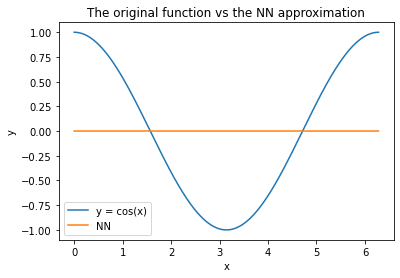

In [9]:
losses=backpropagation(model,x,y,loss,optimizer,epochs=12000)
iterations=[i for i in range(1,len(losses)+1)]
plt.plot(x,y,x,model(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('The original function vs the NN approximation')
plt.legend(['y = cos(x)','NN'])
plt.show()

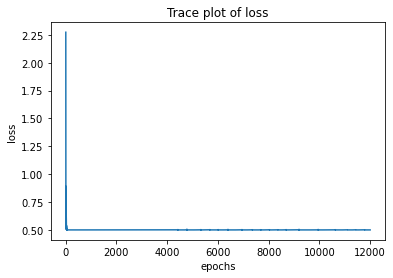

In [10]:
plt.plot(iterations,losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Trace plot of loss')
plt.show()